In [1]:
%matplotlib inline
%qtconsole

import os
import numpy as np
import pandas

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

from datetime import datetime, timedelta
from scipy import stats

import xarray as xr

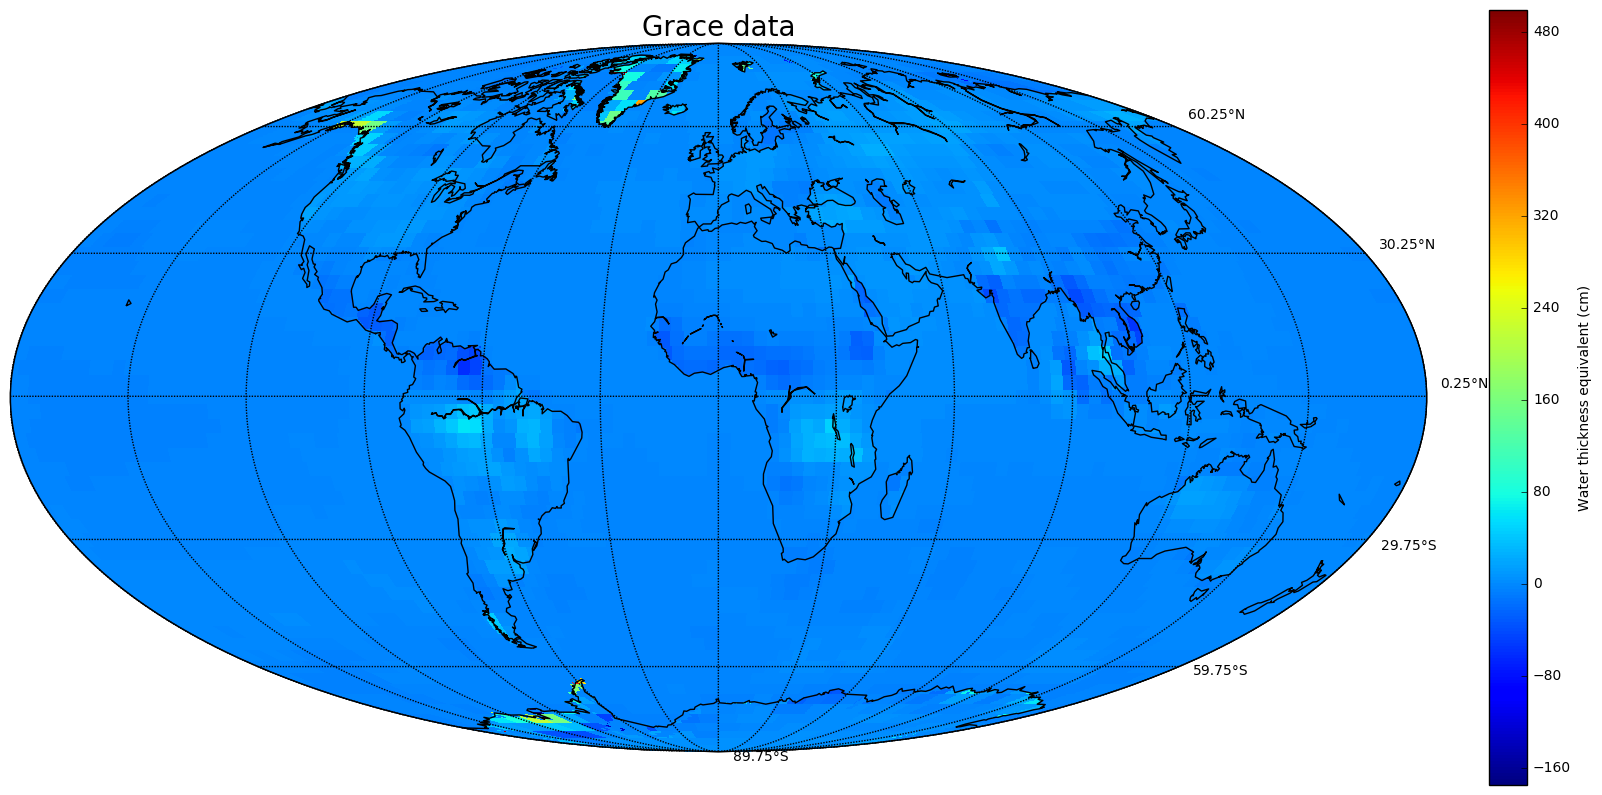

In [65]:
#url = 'http://opendap.jpl.nasa.gov:80/opendap/GeodeticsGravity/tellus/L3/land_mass/RL05/netcdf/GRCTellus.JPL.200204_201607.LND.RL05_1.DSTvSCS1411.nc'
url = 'http://opendap.jpl.nasa.gov:80/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201606.GLO.RL05M_1.MSCNv02CRIv02.nc'
data = xr.open_dataset(url)
rmap = data['lwe_thickness'][0,:,:]

# Extract Lat/Lon Metadata
lat_min = data.geospatial_lat_min
lat_max = data.geospatial_lat_max
lat_res = float(data.geospatial_lat_resolution[0:3])

lon_min = data.geospatial_lon_min
lon_max = data.geospatial_lon_max
lon_res = float(data.geospatial_lon_resolution[0:3])

# Build grid
lon_g = np.arange(lon_min,lon_max+lon_res,lon_res)
lat_g = np.arange(lat_min,lat_max+lat_res,lat_res)
x,y = np.meshgrid(lon_g[:], lat_g[:])

# Plot Fig
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw parallels and meridians.
parallels = np.arange(-89.75,89.75,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',latlon=True)
m.drawcoastlines();
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Water thickness equivalent (cm)')
plt.title('Grace data',size=20)


In [ ]:
# use pd.read_csv to read in the csv data
# Find nearest grid locations for all data